# Prerequisite Steps:

In [113]:
#Load libraries
import pandas as pd
from pandas import read_csv
import matplotlib.pyplot as plt
import numpy as np
from sklearn.model_selection import train_test_split  #importing the train_test_split function from the sklearn library
from sklearn.metrics import accuracy_score
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import confusion_matrix
from sklearn import svm
from sklearn.naive_bayes import MultinomialNB
import seaborn as sns
from sklearn.neighbors import KNeighborsClassifier


In [114]:
#Load the test and train datasets 
train = pd.read_excel('train.xlsx')  
test = pd.read_excel('test.xlsx')  

values_train = train.values
values_test = test.values

train_x, train_y = values_train[:, :-1], values_train[:, -1]  
test_x, test_y = values_test[:, :-1], values_test[:, -1]  



# Logiciall Regression Classification:

In [115]:
# Generate a logical regression model 

model = LogisticRegression(penalty="l2",C=1.0,fit_intercept=True,max_iter=1000)  
model.fit(train_x, train_y)
y_hat = model.predict(test_x)

#print(y_hat)
#print(test_y)

# Print Accuracy
score = accuracy_score(test_y, y_hat)
print("Logicall Regression Accuracy: ", score)

Logicall Regression Accuracy:  0.795


C:\Users\dsana\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:762: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


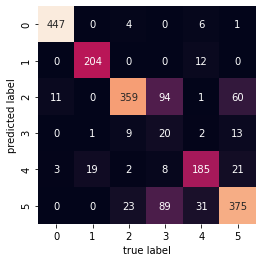

In [116]:
# Generate confusion matrix and heat map for Logical Regression

mat = confusion_matrix(test_y, y_hat)  
sns.heatmap(mat.T, square=True, annot=True, fmt='d', cbar=False,
            )
plt.xlabel('true label')
plt.ylabel('predicted label');

# SVM Classification:

C:\Users\dsana\anaconda3\lib\site-packages\sklearn\svm\_base.py:246: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn('Solver terminated early (max_iter=%i).'


Linear SVM Accuracy:  0.8755


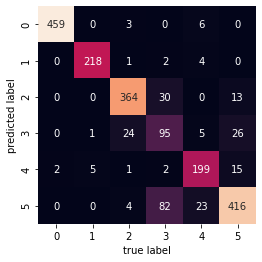

In [117]:
# Linear Kernal

model_lin = svm.SVC(kernel='linear',degree=2,C=1,max_iter=1000)
model_lin.fit(train_x,train_y) 

#evaluate model accuracy
y_hat_lin = model_poly.predict(test_x)
score = accuracy_score(test_y, y_hat_lin)
print("Linear SVM Accuracy: ", score)

#Build a confusion matrix and visualize as a heat map
mat = confusion_matrix(test_y, y_hat_lin)  
sns.heatmap(mat.T, square=True, annot=True, fmt='d', cbar=False,
            )
plt.xlabel('true label')
plt.ylabel('predicted label');

C:\Users\dsana\anaconda3\lib\site-packages\sklearn\svm\_base.py:246: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn('Solver terminated early (max_iter=%i).'


0.8755


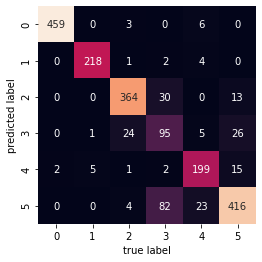

In [118]:
# Polynomial Kernal

model_poly = svm.SVC(kernel='poly',degree=2,C=1,max_iter=1000)
model_poly.fit(train_x,train_y) 

#evaluate model accuracy
y_hat_poly = model_poly.predict(test_x)
score = accuracy_score(test_y, y_hat_poly)
print(score)

#Build a confusion matrix and visualize as a heat map
mat = confusion_matrix(test_y, y_hat_poly)  
sns.heatmap(mat.T, square=True, annot=True, fmt='d', cbar=False,
            )
plt.xlabel('true label')
plt.ylabel('predicted label');

RFB SVM Accuracy:  0.8755


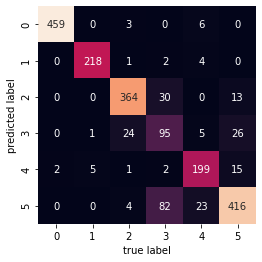

In [119]:
# RBF Kernal

model_rbf = svm.SVC(kernel='rbf',degree=2,C=1,max_iter=1000)
model_rbf.fit(train_x,train_y) 

#evaluate model accuracy
y_hat_rbf = model_poly.predict(test_x)
score = accuracy_score(test_y, y_hat_rbf)
print("RFB SVM Accuracy: ", score)

mat = confusion_matrix(test_y, y_hat_rbf)
sns.heatmap(mat.T, square=True, annot=True, fmt='d', cbar=False,
            )
plt.xlabel('true label')
plt.ylabel('predicted label');

# Naive Bayes Classification:

Accuracy:  0.7685


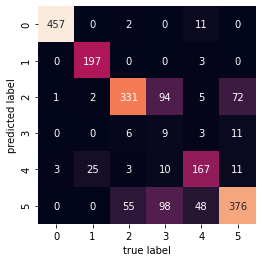

In [120]:
model=MultinomialNB()

model.fit(train_x, train_y)

labels = model.predict(test_x)

#predict the accuracy of the model on test data
score = accuracy_score(test_y, labels)
print("Accuracy: ", score)

#build a confusion matrix to visualize the performance of the model using seaborn
mat = confusion_matrix(test_y, labels)
sns.heatmap(mat.T, square=True, annot=True, fmt='d', cbar=False,
            )
plt.xlabel('true label')
plt.ylabel('predicted label');

In [121]:
#Print the Classification Report
from sklearn.metrics import classification_report
print(classification_report(test_y,labels))


              precision    recall  f1-score   support

           1       0.97      0.99      0.98       461
           2       0.98      0.88      0.93       224
           3       0.66      0.83      0.73       397
           4       0.31      0.04      0.08       211
           5       0.76      0.70      0.73       237
           7       0.65      0.80      0.72       470

    accuracy                           0.77      2000
   macro avg       0.72      0.71      0.70      2000
weighted avg       0.74      0.77      0.74      2000



# K-nearest Neighbours Classification:

Text(0, 0.5, 'Accuracy')

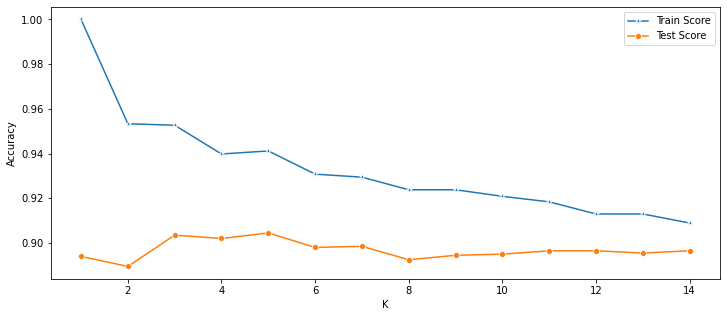

In [122]:
from sklearn.neighbors import KNeighborsClassifier

#Here we will manually try different k values to get the optimal value. k ranges from 1 to 15

#create an empty list to store the accuracy for each k value. This will be later used for comparison
test_scores = []
train_scores = []
#run this for loop to find the best k value
for i in range(1,15):
    #for the current loop assign k=i
    knn = KNeighborsClassifier(i)
    #the training data
    knn.fit(train_x,train_y)
    #predict the class label for the training data
    pred_y_train=knn.predict(train_x)
    #get the training accuracy
    train_accuracy=accuracy_score(pred_y_train,train_y)
    #append the training accuracy at a particular k value to the list.
    train_scores.append(train_accuracy)
    #predict the class label for test data
    pred_y_test=knn.predict(test_x)
    #get the test accuracy
    test_accuracy=accuracy_score(pred_y_test,test_y)
    #append the test accuracy at a particular k value to the list.
    test_scores.append(test_accuracy)

plt.figure(figsize=(12,5))
p = sns.lineplot(range(1,15),train_scores,marker='*',label='Train Score')
p = sns.lineplot(range(1,15),test_scores,marker='o',label='Test Score')
plt.xlabel("K")
plt.ylabel("Accuracy")


Train Accuracy:  0.9089064261555806
Test Accuracy:  0.8965


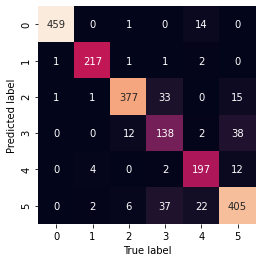

In [123]:
print("Train Accuracy: ",train_scores[13])
print("Test Accuracy: ",test_scores[13])

y_pred = knn.predict(test_x)
#build a confusion matrix to visualize the performance of the model using seaborn
mat = confusion_matrix(test_y, y_pred)
sns.heatmap(mat.T, square=True, annot=True, fmt='d', cbar=False,
 )
plt.xlabel('True label')
plt.ylabel('Predicted label');

In [124]:
print(classification_report(test_y,y_pred))

              precision    recall  f1-score   support

           1       0.97      1.00      0.98       461
           2       0.98      0.97      0.97       224
           3       0.88      0.95      0.92       397
           4       0.73      0.65      0.69       211
           5       0.92      0.83      0.87       237
           7       0.86      0.86      0.86       470

    accuracy                           0.90      2000
   macro avg       0.89      0.88      0.88      2000
weighted avg       0.89      0.90      0.89      2000

